Simple neuron netowrk model based on "simple model of spiking neurons"

In [39]:
import numpy as np
import json
import time
import random
import matplotlib.pyplot as plt
import networkx as nx
from PIL import Image
import glob
import os

In [40]:
threshold = 5
strength = 1
decay = 0.6

name = '/Users/ali/MSci Project/social structure graph data/aggr_15min_cliques_thr5_InVS.json'

def create_graph(name):
    g = open(name)
    G = json.load(g)
    G.sort()
    return G

def intitialise_potential(N):
    P = {} # another graph to keep track of potential
    nodes = N.keys()
    for node in nodes:
        P[node] = random.randint(0,threshold) # keeps track of potential, initialised at 0
    return P

def propagate(P, N): # need to tranmit signal to connected nodes based on strenght of connection, currently unweighted
    nodes = list(N.keys())
    connections = list(N.values())
    potentials = list(P.values())
    size = len(N)
    F = np.zeros(size)
    for i in range(size): # loop over every node and check if firing
        if potentials[i] >= threshold:
            F[i] = 1
            for connection in connections[i]: # list of all nodes needing update
                P[connection] += strength
            P[nodes[i]] = 0
        if potentials[i] > decay:
            P[nodes[i]] -= decay
    return P, F

def simulate(N, P, T):
    activity = []
    for t in range(T):
        #time.sleep(1)
        P, F = propagate(P, N)
        #print('t = ' + str(t) + ', fired = ' + str(fired))
        activity.append(sum(F))
    return activity

def plot(N, P, T, layout = 'spring'):
    files = glob.glob('/Users/ali/MSci Project/IF visualisation/frame*.png')
    for f in files:
        os.remove(f)

    H = nx.Graph(N)

    if layout == 'spring':
        positions = nx.spring_layout(H)
    elif layout == 'kamada':
        positions = nx.kamada_kawai_layout(H)
    else:
        positions = nx.kamada_kawai_layout(H)
        
    plt.figure()
    for t in range(T):
        P, F = propagate(P, N)
        colours = []
        for i in range(len(H)):
            if F[i] == 1:
                colours.append('yellow')
            else:
                colours.append('grey')
        plt.clf()
        #time.sleep(0.5)
        nx.draw_networkx(H, pos = positions, with_labels = False, node_size = 50, node_color = colours, alpha = 0.5)
        plt.savefig('/Users/ali/MSci Project/IF visualisation/frame' + str(t))
        
def make_gif(dur):
    frames = []
    imgs = glob.glob('/Users/ali/MSci Project/IF visualisation/frame*.png')
    for i in imgs:
        new_frame = Image.open(i)
        frames.append(new_frame)
        
    frames[0].save('/Users/ali/MSci Project/IF visualisation.gif', format='GIF',
                append_images=frames[1:],
                save_all=True,
                duration=dur)

    

In [144]:
G = create_graph('/Users/ali/MSci Project/social structure graph data/aggr_15min_cliques_thr5_InVS.json')
print(G)
#print(type(G))

[[15, 223], [17, 66], [17, 102], [17, 335], [17, 762], [17, 804], [17, 875], [29, 39], [29, 662], [35, 268], [48, 179], [50, 119], [50, 311], [50, 762], [50, 771], [56, 29], [56, 132], [56, 205], [56, 819], [56, 939], [66, 102], [79, 39], [80, 50], [80, 102], [80, 222], [80, 285], [80, 311], [80, 494], [80, 765], [80, 875], [95, 39], [95, 223], [101, 511], [102, 335], [105, 113], [105, 181], [105, 513], [113, 242], [113, 513], [113, 939], [116, 335], [119, 335], [120, 29], [120, 95], [120, 172], [120, 196], [120, 253], [120, 494], [120, 765], [120, 819], [122, 79], [122, 154], [122, 271], [122, 533], [123, 39], [123, 79], [123, 150], [123, 164, 253], [123, 172], [123, 222], [123, 311], [123, 845], [131, 804], [131, 845], [132, 79], [132, 164], [132, 172], [134, 431], [153, 63], [153, 122], [153, 150], [153, 154], [153, 492], [153, 533], [153, 709], [154, 271], [154, 492], [154, 499], [172, 196], [172, 311], [179, 101], [179, 102], [179, 804], [184, 118], [184, 253], [184, 255], [184, 8

In [145]:
edges = []
for i in range(len(G)): # inefficient
    edges.append(tuple((str(G[i][0]), str(G[i][1]))))

#print(edges)

unique_nodes = []
for i in G:
    for j in i:
        j = str(j)
        if j in unique_nodes:
            continue
        else:
            unique_nodes.append(j)
    
unique_nodes.sort()
print(unique_nodes)
print(len(unique_nodes))

['101', '102', '105', '113', '116', '118', '119', '120', '122', '123', '131', '132', '134', '15', '150', '153', '154', '164', '17', '172', '179', '181', '184', '185', '194', '196', '205', '209', '210', '211', '213', '222', '223', '240', '242', '253', '255', '265', '267', '268', '271', '273', '275', '285', '29', '311', '335', '35', '39', '431', '448', '48', '481', '492', '494', '496', '499', '50', '511', '513', '533', '56', '601', '603', '63', '66', '662', '709', '743', '751', '762', '765', '771', '778', '779', '784', '786', '79', '791', '80', '804', '819', '826', '845', '87', '875', '938', '939', '95', '987']
90


In [137]:
def EdgeListtoAdjMat(V,E):
    GA = {}
    for a, b in E:
        GA.setdefault(a, []).append(b)
        GA.setdefault(b, []).append(a)
    for v in V:
        if v not in GA:
            GA[v] = []
    return GA

In [146]:
N = EdgeListtoAdjMat(unique_nodes,edges) # adjacency dictionary representation
print(N)
len(N)

{'15': ['223', '253'], '223': ['15', '95', '196', '205', '496', '791', '819', '939'], '17': ['66', '102', '335', '762', '804', '875'], '66': ['17', '102', '209'], '102': ['17', '66', '80', '335', '179'], '335': ['17', '102', '116', '119', '762', '771'], '762': ['17', '50', '116', '119', '134', '150', '285', '335', '511', '771', '875', '784'], '804': ['17', '131', '179', '194', '240', '265', '275', '778', '79', '118', '119', '150', '181', '255', '511', '845', '938'], '875': ['17', '80', '762', '778', '101', '285'], '29': ['39', '662', '56', '120', '779', '819'], '39': ['29', '79', '95', '123', '205', '779'], '662': ['29', '205', '95', '819'], '35': ['268', '210', '265', '826'], '268': ['35', '222', '255', '845', '273', '778', '826'], '48': ['179'], '179': ['48', '101', '102', '804'], '50': ['119', '311', '762', '771', '80', '240'], '119': ['50', '335', '240', '275', '448', '533', '762', '771', '804'], '311': ['50', '80', '123', '172', '194', '196', '205', '255', '786', '819'], '771': ['

90

In [58]:
activity = simulate(N, P, 100000)

plt.plot(activity)
plt.ylabel('activity')
plt.xlabel('time')

NameError: name 'P' is not defined

Next steps:
    visualisation of neurons firing (snapshot or evolution)

In [59]:
scale = 1000
P = intitialise_potential(N)
plot(N, P, scale)
make_gif(int(scale / 100))

TypeError: intitialise_potential() missing 1 required positional argument: 'initial'

Next steps:
- make function to generate N
- find edge weights
- replicate above for weighted graph

Improvements:
    Colour map representation of network
    Implement weights (not present in current .json file, will need to look at network generation file)
    Implement epidemic models
    Compare to differential equation models to find optimal parameters
    Vary parameters to see what effect there is

Epidemic models:
    SI - nodes fire once and remain as emitters after this fact
    SIR - nodes remain firing for a certain amount of time then become immune
    SIS - nodes fire for a certain time then become susceptible again.
    SIRS - nodes remain firing for a time, then become immune for a time, then become susceptible again.

In [337]:
# SI model 

def intitialise_potential(N, initial): # initial defines the fraction of populations that is initially infected
    P = {} # another graph to keep track of potential
    nodes = N.keys()
    for node in nodes:
        if random.random() < initial:
            P[node] = threshold
        else:
            P[node] = 0
    return P

def propagate_SI(P, N): # need to account for beta in model!!!
    threshold = 10
    strength = 1
    beta = 0.6
    connections = list(N.values())
    potentials = list(P.values())
    size = len(N)
    F = np.zeros(size)
    for i in range(size): # loop over every node and check if firing
        if potentials[i] >= threshold:
            if np.random.random() < beta:
                F[i] = 1
        for connection in connections[i]: # list of all nodes needing update
            if np.random.random() < beta: #0.6 is placeholder value for beta
                P[connection] += strength
    return P, F

def propagate_SI(P, N):
    threshold = 2
    strength = 1
    beta = 0.6
    connections = list(N.values())
    potentials = list(P.values())
    size = len(N)
    F = np.zeros(size)
    for i in range(size):
        if potentials[i] >= threshold:
            F[i] = 1
            for connection in connections[i]:
                if np.random.random() < beta:
                    P[connection] += strength
    #print(sum(F))
    return P, F

def simulate_SI(N, P, T, h):
    size = len(N)
    activity = []
    #limit = int(T//h) + 1
    limit = T 
    for t in range(limit):
        #time.sleep(1)
        P, F = propagate_SI(P, N)
        #print('t = ' + str(t) + ', fired = ' + str(fired))
        activity.append(sum(F) / size)
    return activity

def smooth_SI(N, I, T, M, h): # M is number of runs over which to smooth over
    runs = []
    limit = int(T//h) + 1
    limit = T
    for i in range(M):
        P = intitialise_potential(N, I)
        run = simulate_SI(N, P, T, h)
        runs.append(run)
    smoothed = []
    for i in range(limit):
        total = 0
        for j in range(M):
            total += runs[j][i]     
        total = total / M   
        smoothed.append(total)
    return smoothed

In [225]:
# Numerical SI

def SI_diff(initial, beta, T, h): # differential equation representing si model with N total nodes
    I = initial # intial fraction of infected population
    spread = []
    limit = int(T//h) + 1
    for t in range(limit): # can also run until population is fully infected
        I_new = h * beta * I * (1 - I) + I# taking N = 1 as total population
        I = I_new
        spread.append(I_new)
    return spread

In [226]:
# Analytical SI

def analytic_sol(x, beta, c):
    return np.exp(beta*x+c) / (1 + np.exp(beta*x+c))

def integration_const(I):
    return np.log(I/(1-I))

def generate_t(T, h): # generates time axis from 0 to T with increments of h
    return np.arange(0, T, h)

In [472]:
# Creating large network

def avg_degree_intel(graph_dict):
    size = len(graph_dict)
    nodes = list(graph_dict.keys())
    degree_dist = []
    for i in range(size):
        degree_dist.append(len(graph_dict[nodes[i]]))
    avg_degree = sum(degree_dist) / size
    std_degree = np.std(degree_dist)
    return avg_degree, std_degree
        
def generate_degree_dist(avg, std, length):
    degree_dist = []
    while len(degree_dist) < length - 1:
        degree = round(np.random.normal(avg, std))
        if degree >= 0:
            degree_dist.append(degree)
    if sum(degree_dist) % 2 == 1:
        while True:
            degree = round(np.random.normal(avg, std))
            if degree % 2 == 1:
                degree_dist.append(degree)
                break
    else:
        while True:
            degree = round(np.random.normal(avg, std))
            if degree % 2 == 0:
                degree_dist.append(degree)
                break
    return degree_dist

def generate_large_graph(graph_dict, scale, seed = None): # generates a graph with self loops but should not be a problem as an infected node cannot become any more infected that it already is however this may cause poor representation of graph connections, but this is only a problem for small graphs, so should hold for at least SI model in large graph limit
    a, s = avg_degree_intel(graph_dict)
    d = generate_degree_dist(a, s, scale)
    g = nx.configuration_model(d, nx.Graph, seed)
    return g

def adjacency_dict(nx_graph):
    keys = list(nx_graph.nodes())
    adjacency_dict = {}
    for i in range(len(keys)):
        adjacency_dict[keys[i]] = [n for n in nx_graph.neighbors(keys[i])]
    return adjacency_dict

network = generate_large_graph(N, 10000)
nx.draw(network)
network = adjacency_dict(network)   

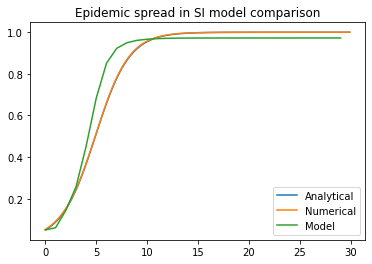

In [473]:
# Comparing model with solution

T = 30 # days over which we simulate
h = 0.1 # time increment
I = 0.05 # initial infected fraction
b = 0.6 # transmission rate of contagion
M = 100 # number of runs to smooth model over
c = integration_const(I)
t = generate_t(T, h)

model_SI = smooth_SI(network, I, T, M, h) # takes T as input needs to be consistent with analytical
#model_SI.append(1) # temporary fix to make dimension of x and y match for plotting

numerical_SI = SI_diff(I, b, T, h) # takes T as input be careful
#numerical_SI.append(1)

analytic_SI = analytic_sol(t, b, c) # should be correct ...

plt.plot(t, analytic_SI, label = 'Analytical')
plt.plot(t, numerical_SI, label = 'Numerical')

t = generate_t(T, 1)
plt.plot(t, model_SI, label = 'Model')

plt.legend(loc = 'lower right')
plt.title('Epidemic spread in SI model comparison')
plt.show()

'''
Even after building a large network with ~ O(5) nodes we still see the finite size effect near the start
and that the model converges to a value less than 1. This is unexpected and could be an indication of a flaw in
executing the model. Further the curves do no match up, this can be resolved by tweaking the threshold, strength
and pershaps the way time is iterated in the model. Should use curve_fit to find optimal thresold and strength
parameters.

But is it worth doing that? If the threshold and strength are dependent on beta all the time then its not worth
it as this initial testing is just a baseline to see if the IF model is working and then it will be applied to
various scenarios. 

This will require testing.
'''

PROBLEM: dimensions of numerical solution not consistnent with others.

TEMPORARY FIX: manually added an element to array with y-vals.

SOLUTION: added on to limit when calculating how many point to simulate.

PROBLEM: Lack of consistency between numerical and analytical

SOLVED: changed parameters to be the same for both and now see good agreement visually

CONCLUSION: numerical solution has been coded correctly

TO DO:
    - Plots comparing different combinations of threshold and strength

MEETING:

 - Discuss propagation algorithm

 - Discuss graph features

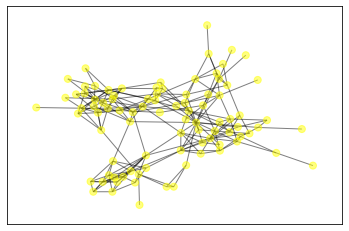

In [334]:
def plot_SI(N, P, T, layout = 'spring'):
    files = glob.glob('/Users/ali/MSci Project/IF visualisation/frame*.png')
    for f in files:
        os.remove(f)

    H = nx.Graph(N)

    if layout == 'spring':
        positions = nx.spring_layout(H)
    elif layout == 'kamada':
        positions = nx.kamada_kawai_layout(H)
    else:
        positions = nx.kamada_kawai_layout(H)
        
    plt.figure()
    for t in range(T):
        P, F = propagate_SI(P, N)
        colours = []
        for i in range(len(H)):
            if F[i] == 1:
                colours.append('yellow')
            else:
                colours.append('grey')
        plt.clf()
        #time.sleep(0.5)
        nx.draw_networkx(H, pos = positions, with_labels = False, node_size = 50, node_color = colours, alpha = 0.5)
        plt.savefig('/Users/ali/MSci Project/IF visualisation/frame' + str(t))
        
        
#scale = 1000
P = intitialise_potential(N, I)
plot_SI(N, P, T)
#make_gif(int(scale / 100))
make_gif(50)

ISSUE: Network has too few nodes to give good results.

NEXT: Fit differential equation to model or fit model to differential equation? will depend if I have a known value of beta, right now both the equation and the model are using values pulled from thin air.

In [49]:
from scipy.optimize import curve_fit

def SI(time, beta, h):
    I_old = 0.05
    for i in range(time):
        I_new = h * beta * I_old * (1 - I_old) + I_old
        I_old = I_new
    return I_old

smoothed_SI = np.array(smoothed_SI)

popt, pcov = curve_fit(SI, t, smoothed_SI)

NameError: name 'smoothed_SI' is not defined

In [ ]:
type(t)

numpy.ndarray

In [50]:
type(smoothed_SI)

NameError: name 'smoothed_SI' is not defined

Solve SI DE for an analytical solution and then try to get IF model working for differient epidemic models